In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [5]:
df.shape

(200, 6)

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
X = df.drop('Drug', axis=1)
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [9]:
y = df['Drug']
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [17]:
sex = le.fit_transform(X['Sex'])
X['Sex'] = sex

bp = le.fit_transform(X['BP'])
X['BP'] = bp

chl = le.fit_transform(X['Cholesterol'])
X['Cholesterol'] = chl

X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(160, 5)

In [21]:
y_train.shape

(160,)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.923\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.762\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.729\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.999\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

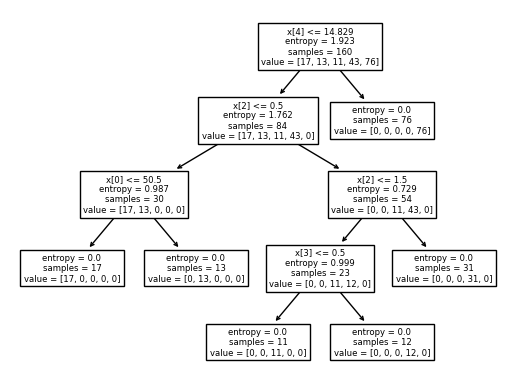

In [34]:
from sklearn import tree
tree.plot_tree(dt.fit(X_train, y_train))

In [35]:
train_pred = dt.predict(X_train)
train_pred

array(['drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB', 'drugA',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugB',
       'drugX', 'drugY', 'drugA', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugY', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugC', 'drugA',
       'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'dru

In [39]:
test_pred = dt.predict(X_test)
test_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [42]:
cm = confusion_matrix(y_test, test_pred)
cm

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]])

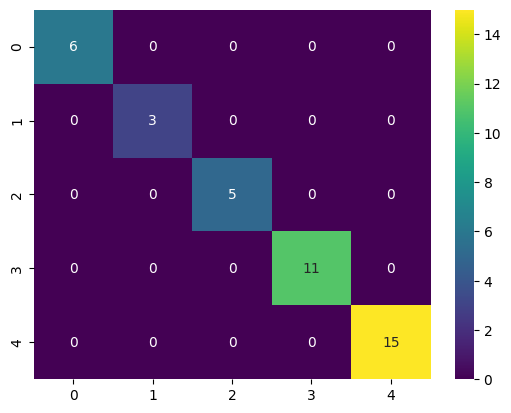

In [45]:
sns.heatmap(cm, cmap='viridis', annot=True)
plt.show()

In [41]:
accuracy_score(y_test, test_pred)

1.0

In [46]:
precision_score(y_test, test_pred, average='weighted')

1.0

In [47]:
recall_score(y_test, test_pred, average='weighted')

1.0

In [49]:
f1_score(y_test, test_pred, average = "weighted")

1.0

In [50]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [52]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='tree.dot', filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

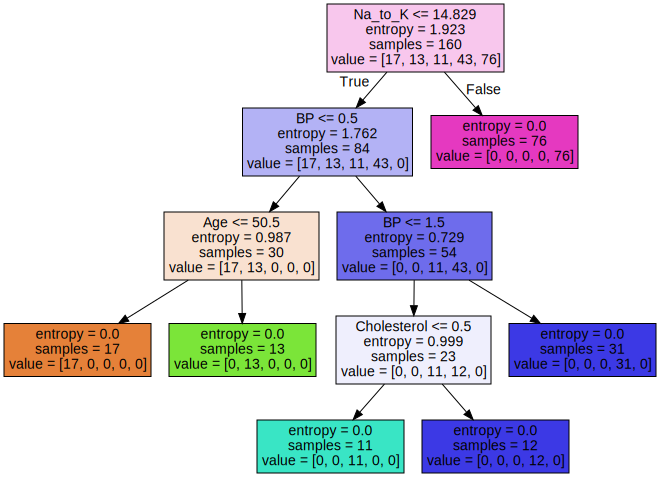

In [54]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)